In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

PREPROCESSED_FILE =  '/content/drive/MyDrive/TCC/dados_leite_preprocessados.csv'
ESSENTIAL_COLUMNS = ["Proteina", "Lactose", "Gordura", "Densidade", "CCS"]


In [ ]:
NUMERIC_COLS = ["Gordura", "Proteina", "Lactose", "CCS"]
GROUP_COL = "Estação"

In [ ]:
dados = pd.read_csv(PREPROCESSED_FILE)

In [ ]:
missing_cols = [col for col in NUMERIC_COLS + [GROUP_COL] if col not in dados.columns]
if missing_cols:
    print(f"Erro: Colunas ausentes no DataFrame: {missing_cols}")
    exit()


print("\n--- Análise Descritiva Geral ---")
print(dados[NUMERIC_COLS].describe().round(2))

print(f"\n--- Análise Descritiva por {GROUP_COL} ---")
# Verifica se a coluna de grupo existe e tem mais de um valor único
if GROUP_COL in dados.columns and dados[GROUP_COL].nunique() > 0:
    try:
        desc_por_estacao = dados.groupby(GROUP_COL)[NUMERIC_COLS].describe().round(2)
        print(desc_por_estacao)
    except Exception as e:
        print(f"Erro ao agrupar por {GROUP_COL}: {e}")
        print(f"Valores únicos em {GROUP_COL}: {dados[GROUP_COL].unique()}")
else:
    print(f"Coluna 	'{GROUP_COL}	' não encontrada ou não possui valores para agrupamento.")



--- Análise Descritiva Geral ---
         Gordura   Proteina    Lactose         CCS
count  184993.00  184993.00  184993.00   184993.00
mean        3.87       3.23       4.37   575718.55
std         0.42       0.20       0.14   284214.40
min         2.60       2.63       3.94    61000.00
25%         3.60       3.10       4.29   338000.00
50%         3.84       3.23       4.38   543000.00
75%         4.12       3.36       4.46   826000.00
max         5.14       3.82       4.80  1000000.00

--- Análise Descritiva por Estação ---
           Gordura                                          Proteina        \
             count  mean   std  min   25%   50%   75%   max    count  mean   
Estação                                                                      
Inverno    49427.0  3.86  0.40  2.6  3.60  3.84  4.09  5.14  49427.0  3.25   
Outono     58913.0  3.97  0.43  2.6  3.70  3.95  4.24  5.14  58913.0  3.28   
Primavera  24171.0  3.75  0.37  2.6  3.51  3.72  3.96  5.14  24171.0  3.16   

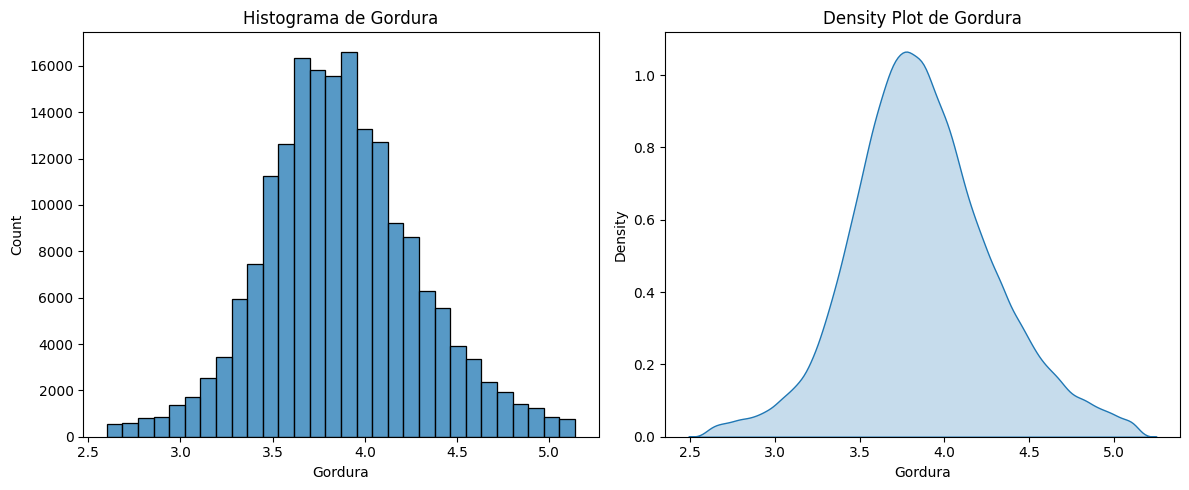

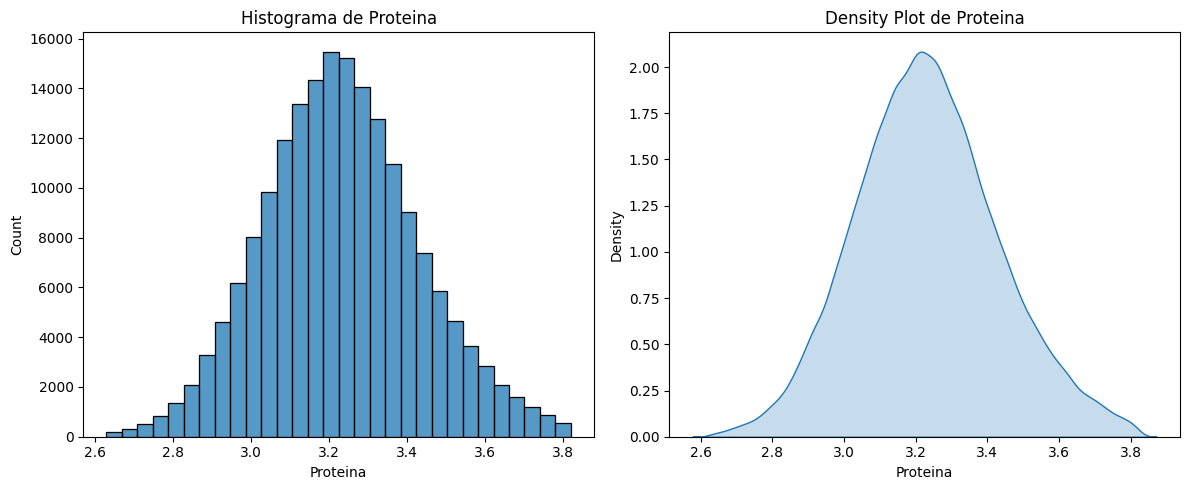

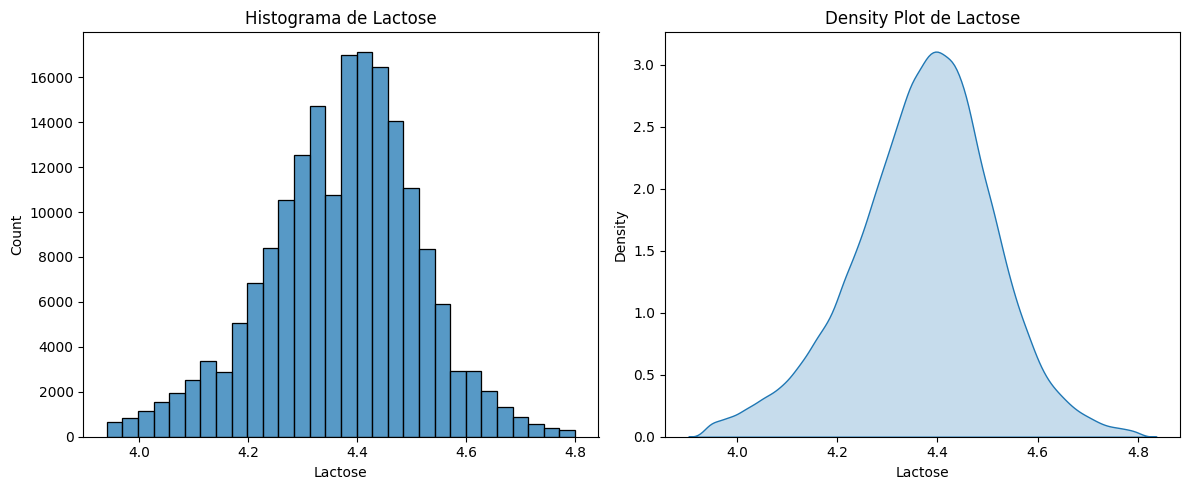

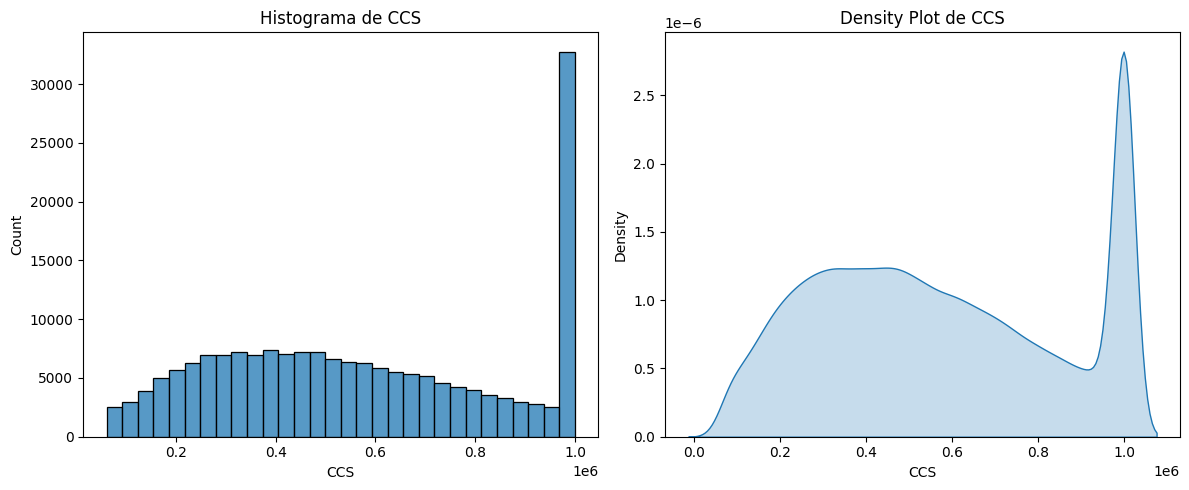

In [ ]:


#  histograma e density plot
for col in NUMERIC_COLS:
    plt.figure(figsize=(12, 5))

    # histograma
    plt.subplot(1, 2, 1)
    sns.histplot(dados[col], kde=False, bins=30)
    plt.title(f"Histograma de {col}")

    #Density Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(dados[col], fill=True)
    plt.title(f"Density Plot de {col}")


    plt.tight_layout()
    plt.show()


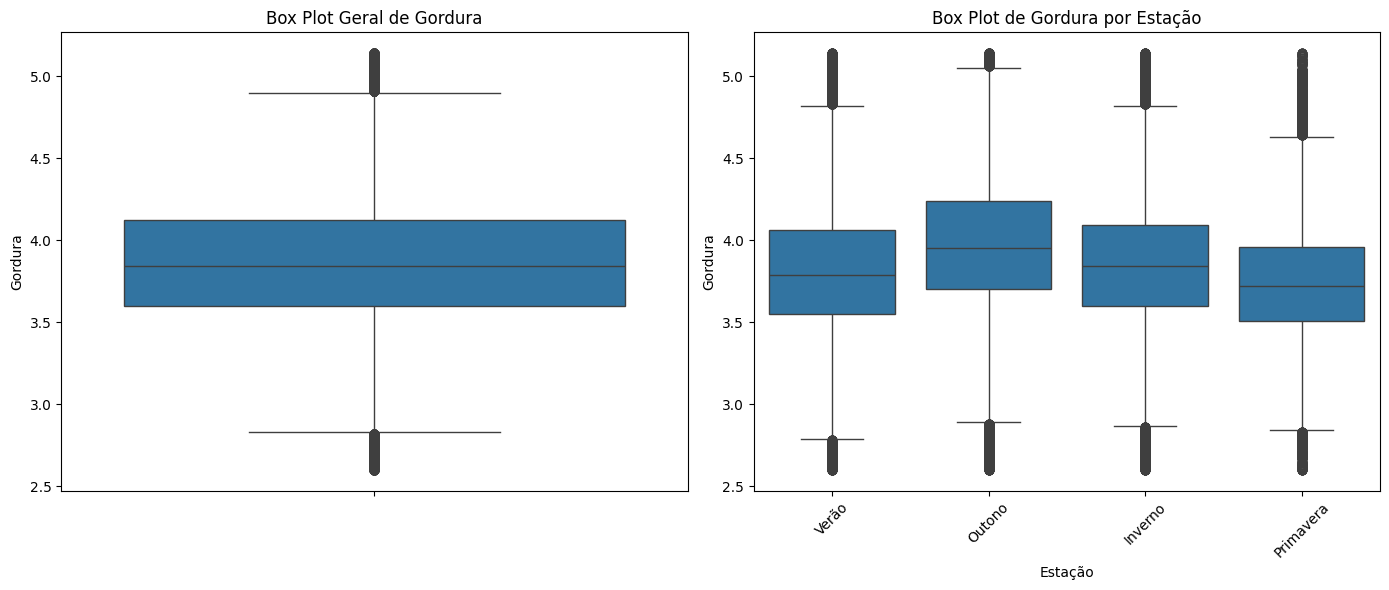

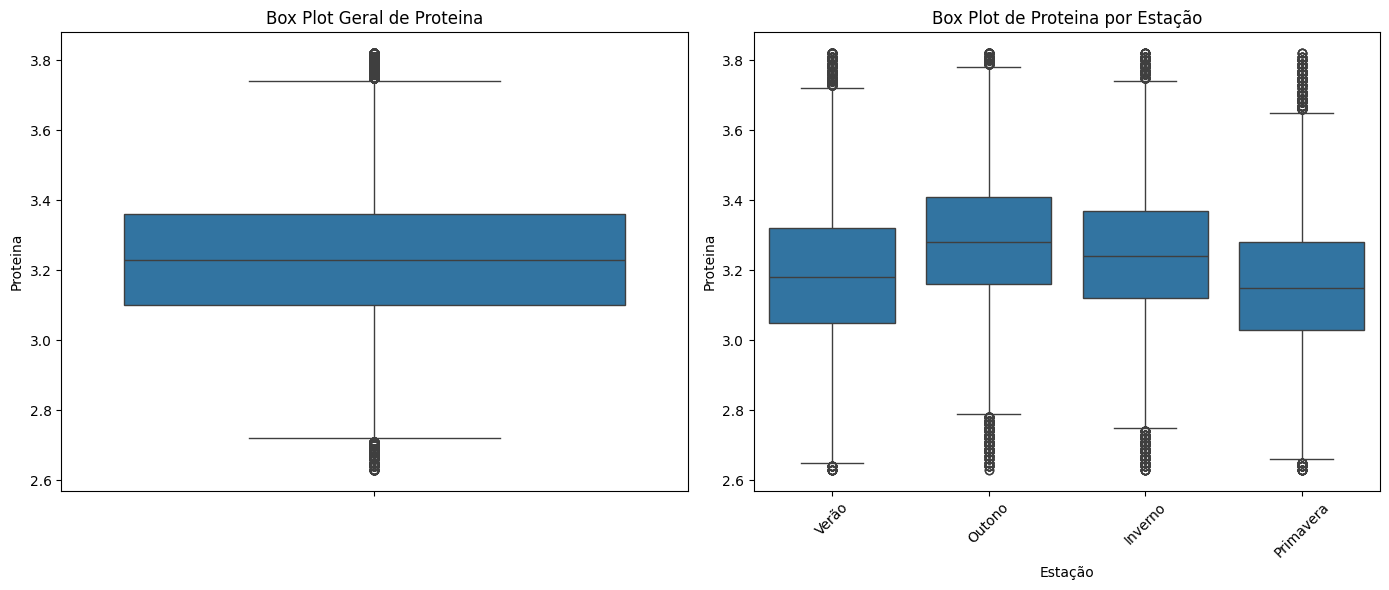

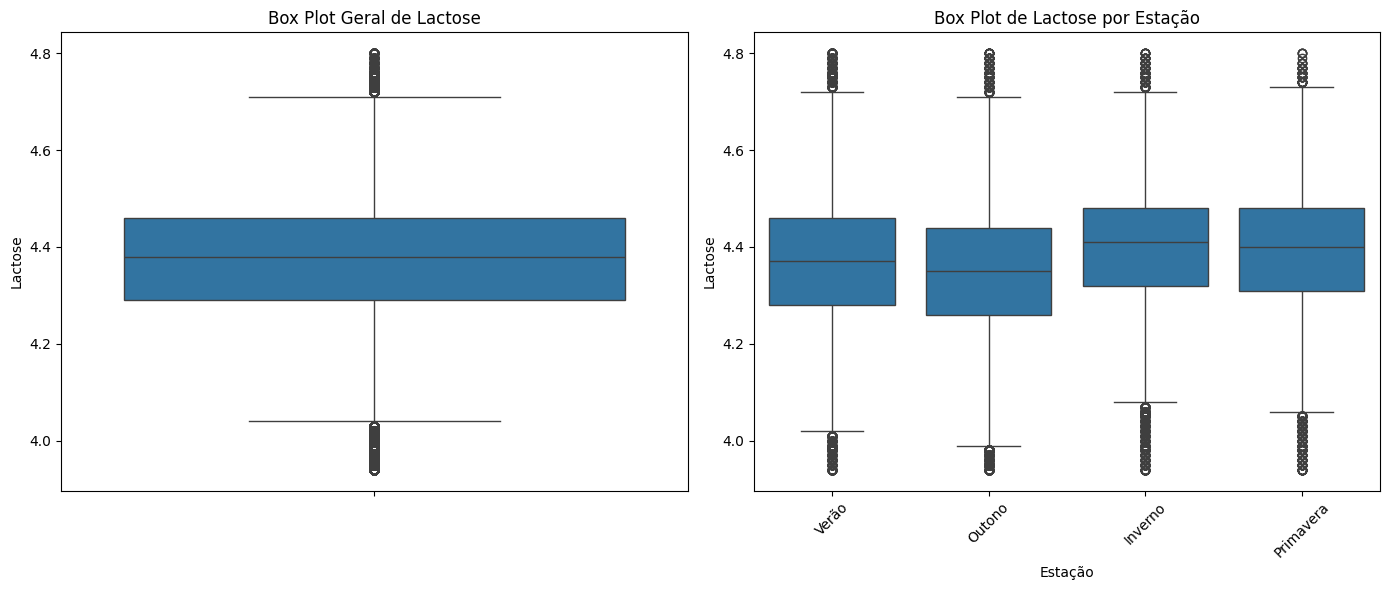

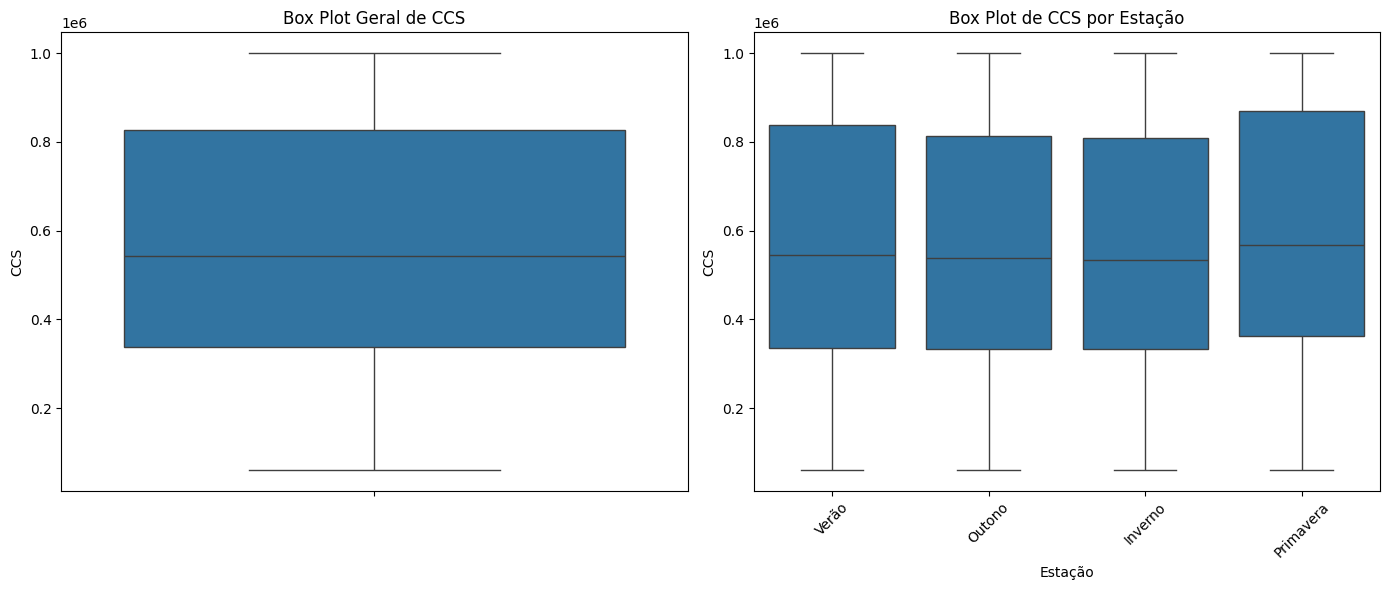

In [ ]:
for col in NUMERIC_COLS:
    plt.figure(figsize=(14, 6))

    # Box Plot Geral
    plt.subplot(1, 2, 1)
    sns.boxplot(y=dados[col])
    plt.title(f"Box Plot Geral de {col}")

    # Box Plot por Estação
    if GROUP_COL in dados.columns and dados[GROUP_COL].nunique() > 1:
        plt.subplot(1, 2, 2)
        sns.boxplot(x=GROUP_COL, y=col, data=dados)
        plt.title(f"Box Plot de {col} por {GROUP_COL}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


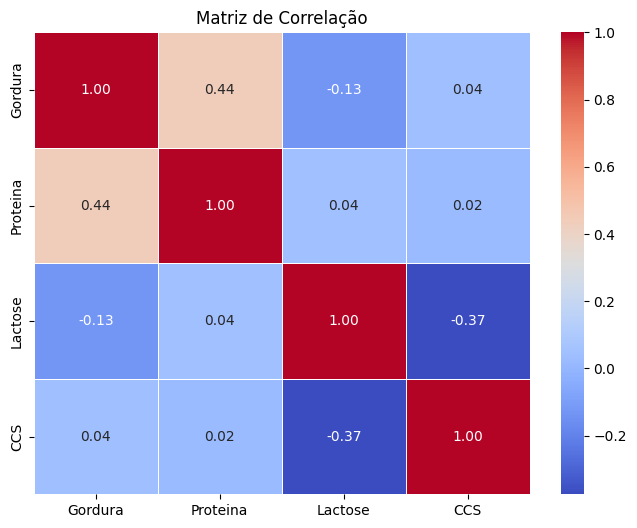

In [ ]:
numeric_data_for_corr = dados[NUMERIC_COLS].select_dtypes(include=np.number)
if not numeric_data_for_corr.empty:
    correlation_matrix = numeric_data_for_corr.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
    plt.title("Matriz de Correlação")
    plt.show()
else:
    print("erro")

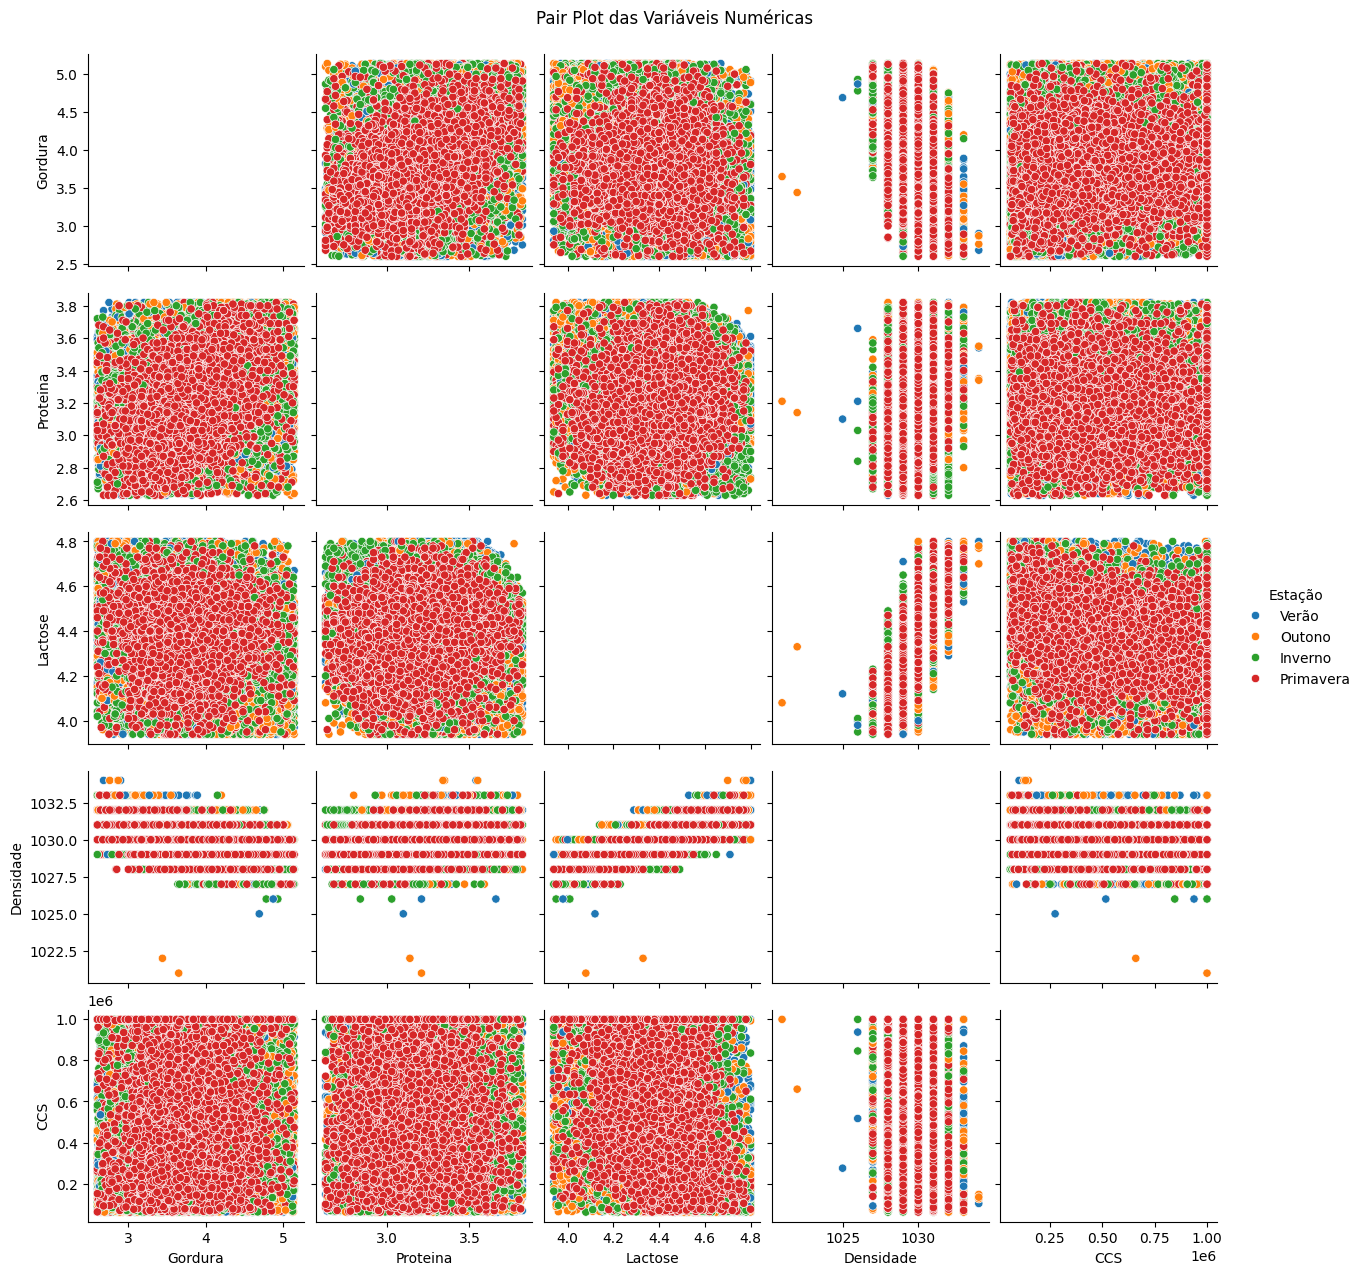

In [ ]:
#pairplot
pairplot_vars = NUMERIC_COLS
pairplot_hue = GROUP_COL if GROUP_COL in dados.columns and dados[GROUP_COL].nunique() > 1 else None

sns.pairplot(dados, vars=pairplot_vars, hue=pairplot_hue, diag_kind=	'kde	')
plt.suptitle("Pair Plot das Variáveis Numéricas", y=1.02)
plt.show()

